In [8]:
## Importing important stuff
import random
import numpy as np
import pandas as pd
from PIL import Image 
import tifffile as tiff
             ###############
#plotting
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go

# Run this code to make plots display properly in notebooks
%matplotlib inline
            ####################
#machine learning stuff
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical   
###
from keras import models
from keras import layers
###
import pickle as pkl
import time

In [9]:
from PIL import Image
from tifffile import imsave

In [2]:
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, concatenate
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras import backend as K

import os
import pickle

In [3]:
##  very good

#load other testing data
x_TT_orig = np.load('x_true_test_128.npy')
y_TT_orig = np.load('y_true_test_128.npy')

# reshape them 
x_TT = x_TT_orig.reshape(x_TT_orig.shape[0],128,128,1)
y_TT = y_TT_orig.reshape(y_TT_orig.shape[0],128,128,1)
#predict the other testing data. 
#
#

In [4]:
x_TT_sc = x_TT/3020.0
y_TT_sc = y_TT/3020.0

In [5]:
#loading the model 
model = load_model('UNET_128_short.h5')

In [6]:
new_pre_sc= model.predict(x_TT_sc[:20])

In [ ]:
#checking correspondance 
#####check for correspondance
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 10))
for i in range(n):
    # display original
    
    ax1 = plt.subplot(3, n, i + 1)
    ax1.title.set_text('bad images')
    plt.imshow(x_TT_sc[i].reshape(128, 128))
    plt.gray()
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
        # display reconstruction
    
    ax2 = plt.subplot(3, n, i + 1 + n)
    ax2.title.set_text('predicted images')
    plt.imshow(new_pre_sc[i].reshape(128, 128))
    plt.gray()
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
            # display reconstruction
    
    ax3 = plt.subplot(3, n, i + 1 + n+n)
    ax3.title.set_text('good images')
    plt.imshow(y_TT_sc[i].reshape(128, 128))
    plt.gray()
    ax3.get_xaxis().set_visible(False)
    ax3.get_yaxis().set_visible(False)

plt.show()

The output is actually not correct for 2 out of the 4 images 

In [10]:
def save_multi_tif(i):
    #creating the list 
    init_list=[0,0,0]
    init_list[0] = x_TT_orig[i]
    init_list[1] = y_TT_orig[i]
    init_list[2] = new_pre_sc[i].reshape(128,128)*3020.0
    #changing the list a numpy array and reshaping
    nparr= np.asarray(init_list).reshape(3,128,128,1)
    #changing to 16 bit
    corr_array = np.uint16(nparr)
    ## saving it
    imsave('/users/PAS1495/akl2/work/increase_SNR/tiff_folder/multi_'+str(i)+'.tif', corr_array)

In [11]:
### Creating a function to load up measurements for a cell and 
def lists_for_plot(path):
    data = pd.read_csv(str(path)) 
    y_index = list(range(0,len(data),3))
    pred_index = list(range(1,len(data),3))
    x_index = list(range(2,len(data),3))
    #Max, min and mean lists
    max_y_list = data.iloc[y_index, 4].values
    max_x_list = data.iloc[x_index, 4].values
    max_pred_list = data.iloc[pred_index, 4].values
    min_y_list = data.iloc[y_index, 3].values
    min_x_list = data.iloc[x_index, 3].values
    min_pred_list = data.iloc[pred_index, 3].values
    mean_y_list = data.iloc[y_index, 2].values
    mean_x_list = data.iloc[x_index, 2].values
    mean_pred_list = data.iloc[pred_index, 2].values
    ######## Normalization 
    norm_max_y_list = max_y_list/max_y_list[0]
    norm_max_x_list = max_x_list/max_x_list[0]
    norm_max_pred_list = max_pred_list/max_pred_list[0]
    norm_min_y_list = min_y_list/min_y_list[0]
    norm_min_x_list = min_x_list/min_x_list[0]
    norm_min_pred_list = min_pred_list/min_pred_list[0]
    norm_mean_y_list = mean_y_list/mean_y_list[0]
    norm_mean_x_list = mean_x_list/mean_x_list[0]
    norm_mean_pred_list = mean_pred_list/mean_pred_list[0]
    ## How does total intensity compare??
    area_list = data.iloc[y_index, 1].values
    tot_int_x = mean_x_list*area_list
    tot_int_y = mean_y_list*area_list
    tot_int_pred = mean_pred_list*area_list
    norm_tot_int_x = tot_int_x/tot_int_x[0]
    norm_tot_int_y = tot_int_y/tot_int_y[0]
    norm_tot_int_pred =tot_int_pred/tot_int_pred[0]
    list_dic={'x':{'mean':norm_mean_x_list,'max':norm_max_x_list,'min':norm_min_x_list,'tot':norm_tot_int_x},
         'y':{'mean':norm_mean_y_list,'max':norm_max_y_list,'min':norm_min_y_list,'tot':norm_tot_int_y},
         'pred':{'mean':norm_mean_pred_list,'max':norm_max_pred_list,'min':norm_min_pred_list,'tot':norm_tot_int_pred}}
    return list_dic
    
#print('y_index list is ', y_index)
#print('pred_index list is ' , pred_index)
#print('x_index list is ', x_index)
# Preview the first 5 lines of the loaded data 


In [25]:
# Do not rerun 
#Saving image as jpg
import scipy.misc
scipy.misc.imsave('/users/PAS1495/akl2/work/increase_SNR/tiff_folder/outfile.jpg', y_TT_orig[i])

/apps/python/3.6-conda5.2/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning:

`imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.



In [22]:
save_multi_tif(0)

In [16]:
########### if the array is only of dim 3, then it gets exported into different channels. 
from tifffile import imsave
###What goes inside this array has to be (#number of frames, 128, 128, 1)
arr= np.uint16(y_TT_sc[:4].reshape(4,128,128)*3020.0)
imsave('good_multi_diffch.tif', arr)

Some quantitative graphs to examine if rations of intensities was preserved

In [31]:
import pandas as pd 
#This is the file showing data from sample [0], it is the area of a certain selection, the mean, the min
#and the max of this selection, 
#the selection remains constant through the different images LOW SNR, high SNR, and predicted. 
data = pd.read_csv('/users/PAS1495/akl2/work/increase_SNR/Analysis Data, tiffs and others/sample[0] total square intensities.csv') 
# Preview the first 5 lines of the loaded data 
data.head()

,,Area,Mean,Min,Max
0,1,35,281.771,140,661
1,2,35,301.429,137,570
2,3,35,110.657,96,142
3,4,30,322.133,154,637
4,5,30,337.233,156,611


In [65]:
print(data.Mean.values* data.Area.values)

[ 9861.985 10550.015  3872.995  9663.99  10116.99   3390.99  17153.024
 19851.008  7070.016 22522.984 22943.976  9531.016 19672.002 19350.009
  6973.974 18000.024 19278.     6274.016 25492.005 27021.015  7321.986
 20200.032 20576.016  7887.024 10925.01  10712.01   3405.    12535.992
 13148.016  4692.996  9804.99  10928.01   3438.   ]


In [43]:
print(data)

        Area     Mean  Min   Max
0    1    35  281.771  140   661
1    2    35  301.429  137   570
2    3    35  110.657   96   142
3    4    30  322.133  154   637
4    5    30  337.233  156   611
5    6    30  113.033   97   148
6    7    64  268.016  116   859
7    8    64  310.172   99   807
8    9    64  110.469   96   152
9   10    88  255.943  116   749
10  11    88  260.727  100   638
11  12    88  108.307   96   148
12  13    63  312.254  117   885
13  14    63  307.143  113   687
14  15    63  110.698   95   139
15  16    56  321.429  124   764
16  17    56  344.250  108   798
17  18    56  112.036   97   160
18  19    63  404.635  153  1011
19  20    63  428.905  110   954
20  21    63  116.222   97   167
21  22    72  280.556  113   820
22  23    72  285.778  107   672
23  24    72  109.542   94   142
24  25    30  364.167  163   757
25  26    30  357.067  151   579
26  27    30  113.500   97   140
27  28    42  298.476  138   634
28  29    42  313.048  135   577
29  30    

In [39]:
numpy_data = np.array([0]*11)
print(numpy_data)

[0 0 0 0 0 0 0 0 0 0 0]


In [76]:
len(data)

33

In [44]:
y_index = list(range(0,33,3))
pred_index = list(range(1,33,3))
x_index = list(range(2,33,3))
print('y_index list is ', y_index)
print('pred_index list is ' , pred_index)
print('x_index list is ', x_index)

y_index list is  [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
pred_index list is  [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31]
x_index list is  [2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32]


In [46]:
print('y_index list is ', y_index, 'with length', len(y_index))

y_index list is  [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30] with length 11


In [48]:
max_y_list = data.iloc[y_index, 4].values
max_x_list = data.iloc[x_index, 4].values
max_pred_list = data.iloc[pred_index, 4].values
min_y_list = data.iloc[y_index, 3].values
min_x_list = data.iloc[x_index, 3].values
min_pred_list = data.iloc[pred_index, 3].values
mean_y_list = data.iloc[y_index, 2].values
mean_x_list = data.iloc[x_index, 2].values
mean_pred_list = data.iloc[pred_index, 2].values

In [51]:
######## Normalization 
### Ratio of bright spots 
norm_max_y_list = max_y_list/max_y_list[0]
norm_max_x_list = max_x_list/max_x_list[0]
norm_max_pred_list = max_pred_list/max_pred_list[0]
norm_min_y_list = min_y_list/min_y_list[0]
norm_min_x_list = min_x_list/min_x_list[0]
norm_min_pred_list = min_pred_list/min_pred_list[0]
norm_mean_y_list = mean_y_list/mean_y_list[0]
norm_mean_x_list = mean_x_list/mean_x_list[0]
norm_mean_pred_list = mean_pred_list/mean_pred_list[0]

In [52]:
print(norm_max_pred_list)

[1.         1.07192982 1.41578947 1.11929825 1.20526316 1.4
 1.67368421 1.17894737 1.01578947 1.0122807  1.08947368]


In [53]:
print(norm_min_pred_list)

[1.         1.13868613 0.72262774 0.72992701 0.82481752 0.78832117
 0.80291971 0.7810219  1.10218978 0.98540146 1.18248175]


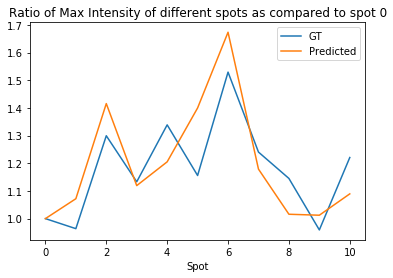

In [74]:
from matplotlib import pyplot as plt
plt.plot(norm_max_y_list, label = 'GT')
plt.plot(norm_max_pred_list, label = 'Predicted')
#plt.plot(norm_max_x_list, label = 'Low SNR')
plt.legend(loc='best')
plt.xlabel('Spot')
#plt.ylabel('Max intensity/Max intensity of spot 0')
plt.title('Ratio of Max Intensity of different spots as compared to spot 0')
plt.legend()
plt.show()

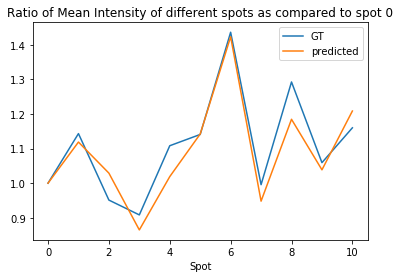

In [72]:
from matplotlib import pyplot as plt
plt.plot(norm_mean_y_list, label = 'GT')
plt.plot(norm_mean_pred_list, label = 'predicted')
plt.xlabel('Spot')
plt.legend(loc='best')
#plt.ylabel('Max intensity/Max intensity of spot 0')
plt.title('Ratio of Mean Intensity of different spots as compared to spot 0')
#plt.plot(norm_mean_x_list, label = 'Low SNR')
plt.show()

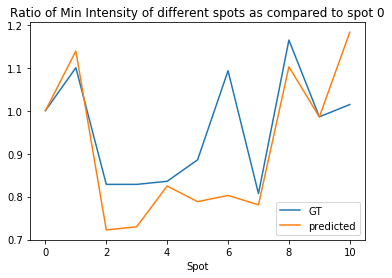

In [75]:
from matplotlib import pyplot as plt
plt.plot(norm_min_y_list, label = 'GT')
plt.plot(norm_min_pred_list, label = 'predicted')
#plt.plot(norm_min_x_list, label = 'Low SNR')
plt.xlabel('Spot')
plt.legend(loc='best')
#plt.ylabel('Max intensity/Max intensity of spot 0')
plt.title('Ratio of Min Intensity of different spots as compared to spot 0')
plt.show()

In [66]:
## How does total intensity compare??
area_list = data.iloc[y_index, 1].values
tot_int_x = mean_x_list*area_list
tot_int_y = mean_y_list*area_list
tot_int_pred = mean_pred_list*area_list
norm_tot_int_x = tot_int_x/tot_int_x[0]
norm_tot_int_y = tot_int_y/tot_int_y[0]
norm_tot_int_pred =tot_int_pred/tot_int_pred[0]

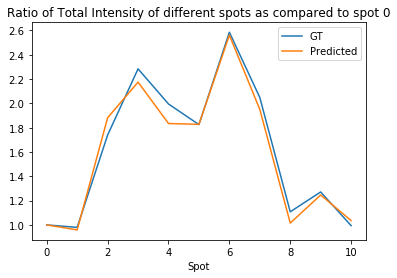

In [68]:
from matplotlib import pyplot as plt
plt.plot(norm_tot_int_y, label = 'GT')
plt.plot(norm_tot_int_pred, label = 'Predicted')
#plt.plot(norm_tot_int_x, label = 'Low SNR')
plt.xlabel('Spot')
#plt.ylabel('Max intensity/Max intensity of spot 0')
plt.title('Ratio of Total Intensity of different spots as compared to spot 0')
plt.legend()
plt.show()

In [83]:
dic= {1:{1:'apple'}, 2:'banana', 3:'whatve'}

In [89]:
dic[1][1]

'apple'

In [94]:
path= '/users/PAS1495/akl2/work/increase_SNR/Analysis Data, tiffs and others/sample[0] total square intensities.csv'
my_dictionary=lists_for_plot(path)

In [95]:
my_dictionary['x']['mean']== norm_mean_x_list

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])